In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from scipy import interpolate
from scipy.signal import argrelextrema
import scipy
import statistics
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
# global variables/parameters
n = 5000
smoothing_factor = 5

## Differentiating ptaient vs. control files

In [5]:
excel = pd.read_excel('corpus_PaHaW.xlsx', engine = 'openpyxl')
# exclude patients 61, 80, 89
category = excel['Disease'].drop([46, 60, 66]).values

fileNames = []
controlFiles = []
patientFiles = []
directory = os.fsencode('/work/PaHaW_spirals')
for file in os.listdir(directory): 
    filename = os.fsdecode(file)
    path = os.path.join('/work/PaHaW_spirals', filename)
    fileNames.append(path)

fileNames.sort()
print (fileNames)

for i in range(len(fileNames)):
    if category[i] == 'PD':
        patientFiles.append(fileNames[i])
    else:
        controlFiles.append(fileNames[i])

['/work/PaHaW_spirals/00001__1_1.csv', '/work/PaHaW_spirals/00002__1_1.csv', '/work/PaHaW_spirals/00003__1_1.csv', '/work/PaHaW_spirals/00004__1_1.csv', '/work/PaHaW_spirals/00005__1_1.csv', '/work/PaHaW_spirals/00006__1_1.csv', '/work/PaHaW_spirals/00007__1_1.csv', '/work/PaHaW_spirals/00008__1_1.csv', '/work/PaHaW_spirals/00009__1_1.csv', '/work/PaHaW_spirals/00010__1_1.csv', '/work/PaHaW_spirals/00013__1_1.csv', '/work/PaHaW_spirals/00014__1_1.csv', '/work/PaHaW_spirals/00015__1_1.csv', '/work/PaHaW_spirals/00016__1_1.csv', '/work/PaHaW_spirals/00017__1_1.csv', '/work/PaHaW_spirals/00018__1_1.csv', '/work/PaHaW_spirals/00019__1_1.csv', '/work/PaHaW_spirals/00020__1_1.csv', '/work/PaHaW_spirals/00022__1_1.csv', '/work/PaHaW_spirals/00023__1_1.csv', '/work/PaHaW_spirals/00024__1_1.csv', '/work/PaHaW_spirals/00025__1_1.csv', '/work/PaHaW_spirals/00026__1_1.csv', '/work/PaHaW_spirals/00027__1_1.csv', '/work/PaHaW_spirals/00028__1_1.csv', '/work/PaHaW_spirals/00029__1_1.csv', '/work/PaHa

## Altitude & Azimuth (Pen Angle)

### Function to prevent overflow for azimuth values

In [76]:
def azimuthPreventOverflow(csv_path):
    df = pd.read_csv(csv_path, header = None)
    azimuth_read = df[4]
    maximum = azimuth_read.max()
    azimuth = []
    # accounts for jumps
    threshold = 0.4
    if 0 in azimuth_read: 
        for i in azimuth_read: 
            if i/maximum < threshold: 
                i += maximum
            azimuth.append(i)
    else: 
        azimuth = azimuth_read
    return azimuth
    #return azimuth, azimuth_read 

### Azimuth for Control Subjects after Preveting Overflow

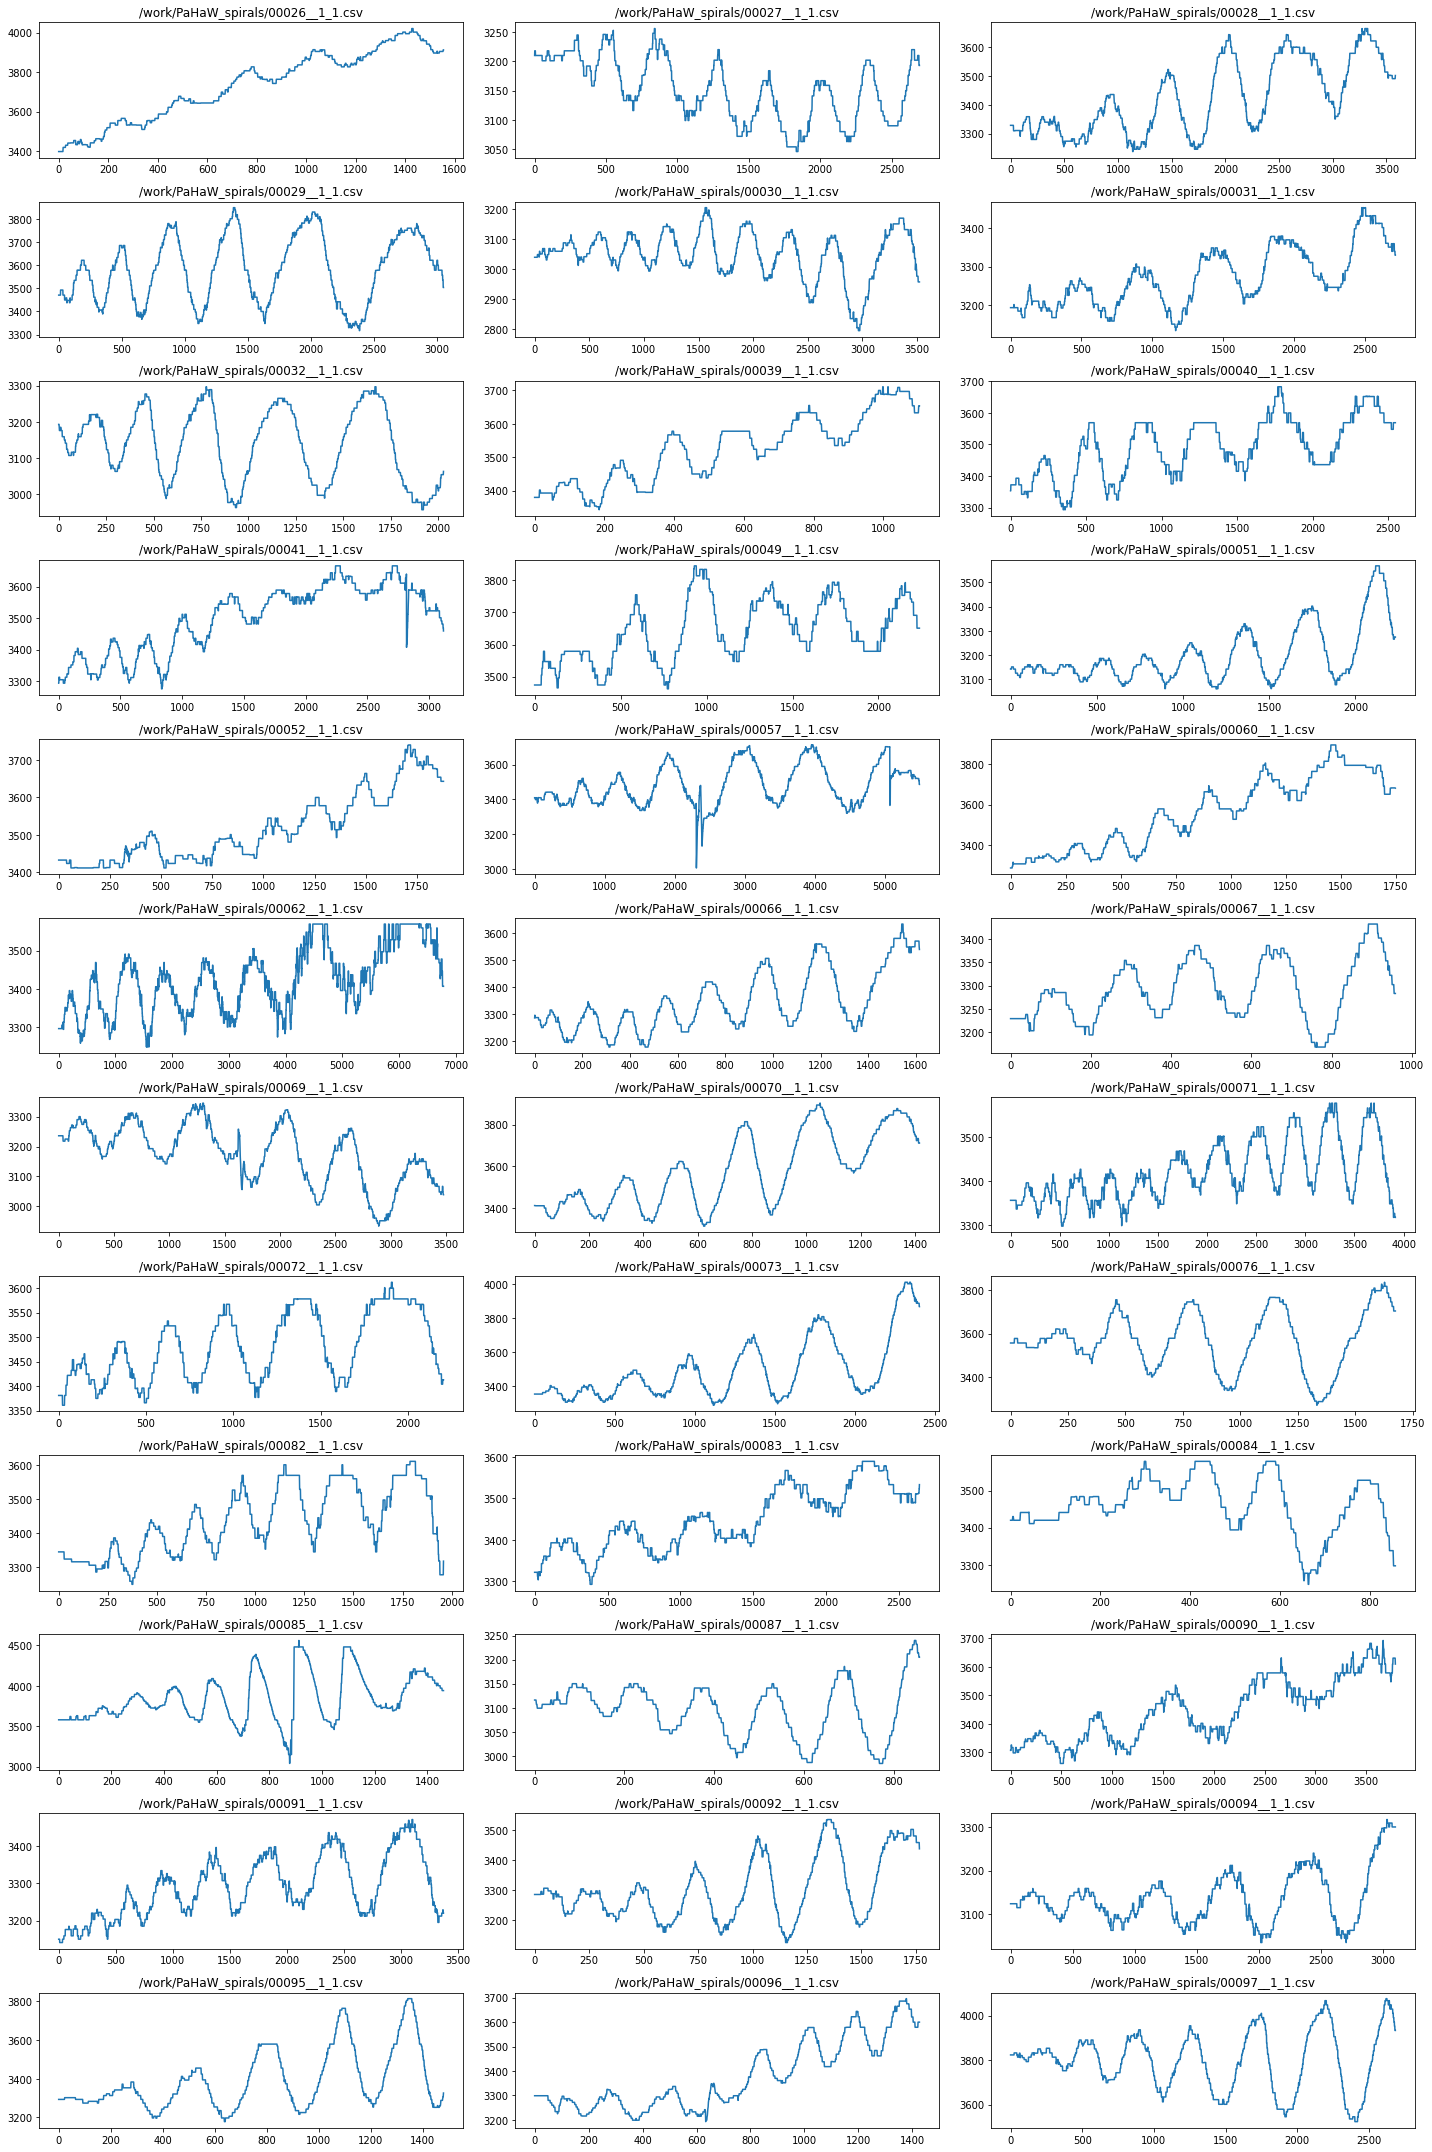

True


In [73]:
count = 0
plt.figure(figsize = (20, 30), tight_layout = True)
bo = True
for filename in controlFiles: 
    azimuth = azimuthPreventOverflow(filename)
    count += 1
    plt.subplot(12, 3, count)
    plt.plot(azimuth)
    plt.title(filename)
    if 0 in azimuth: 
        bo = False
plt.show()
print(bo)

### Azimuth for Patients after Preveting Overflow

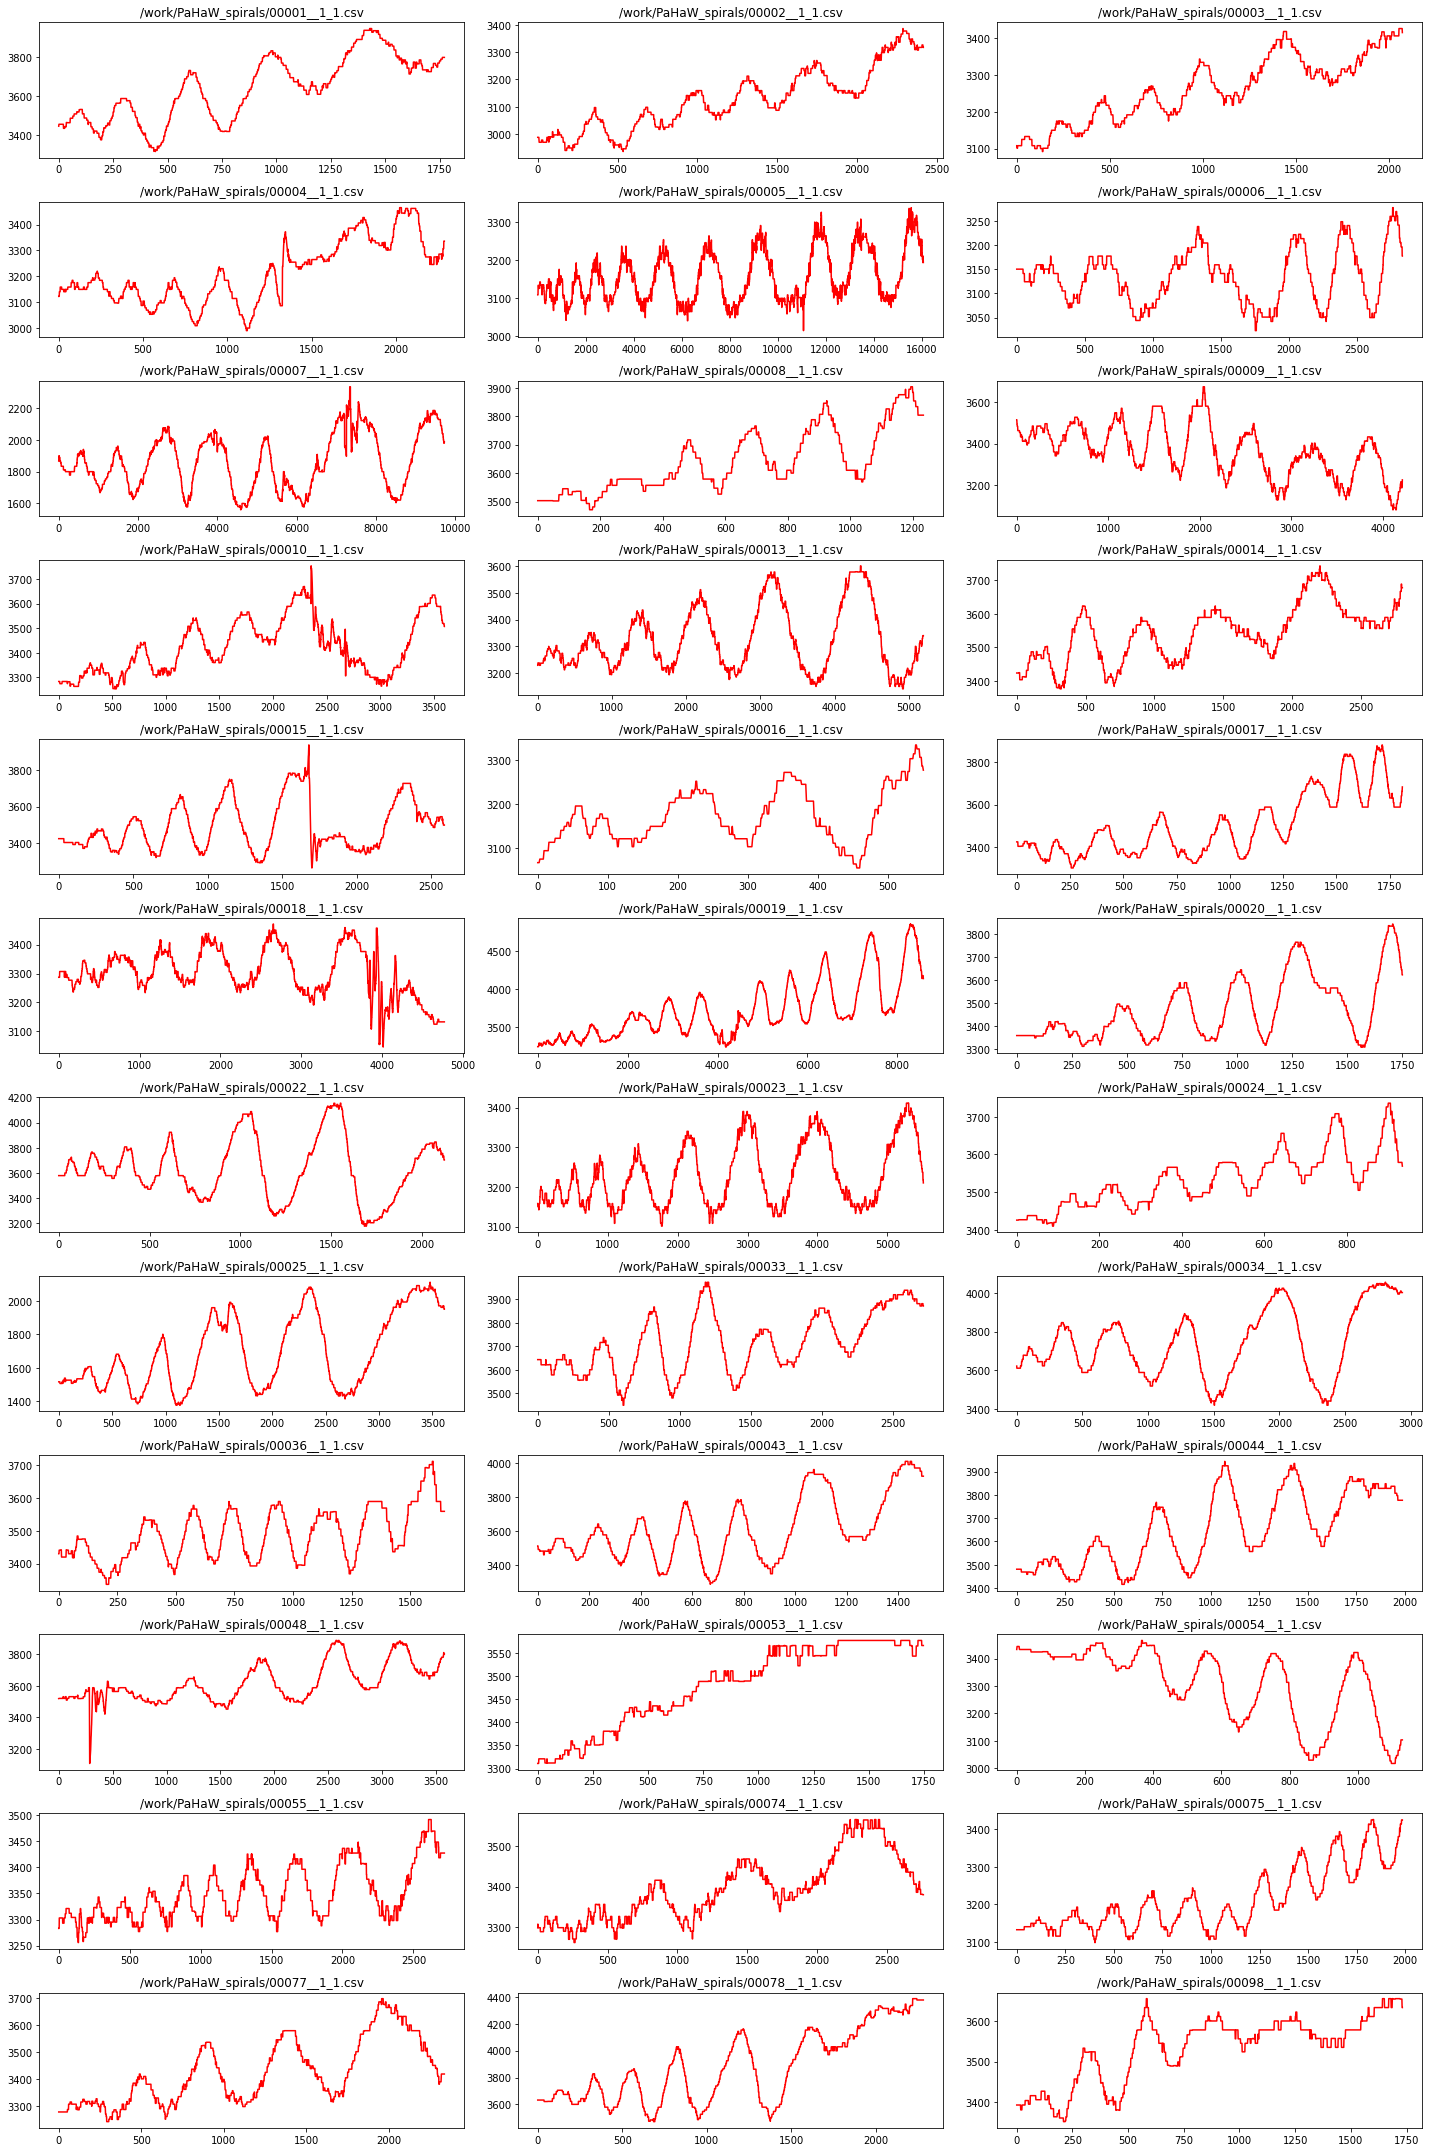

True


In [75]:
count = 0
plt.figure(figsize = (20, 30), tight_layout = True)
bo = True
for filename in patientFiles: 
    azimuth = azimuthPreventOverflow(filename)
    count += 1
    plt.subplot(12, 3, count)
    plt.plot(azimuth, 'r')
    plt.title(filename)
    if 0 in azimuth: 
        bo = False
plt.show()
print(bo)

### Altitude Plots Control

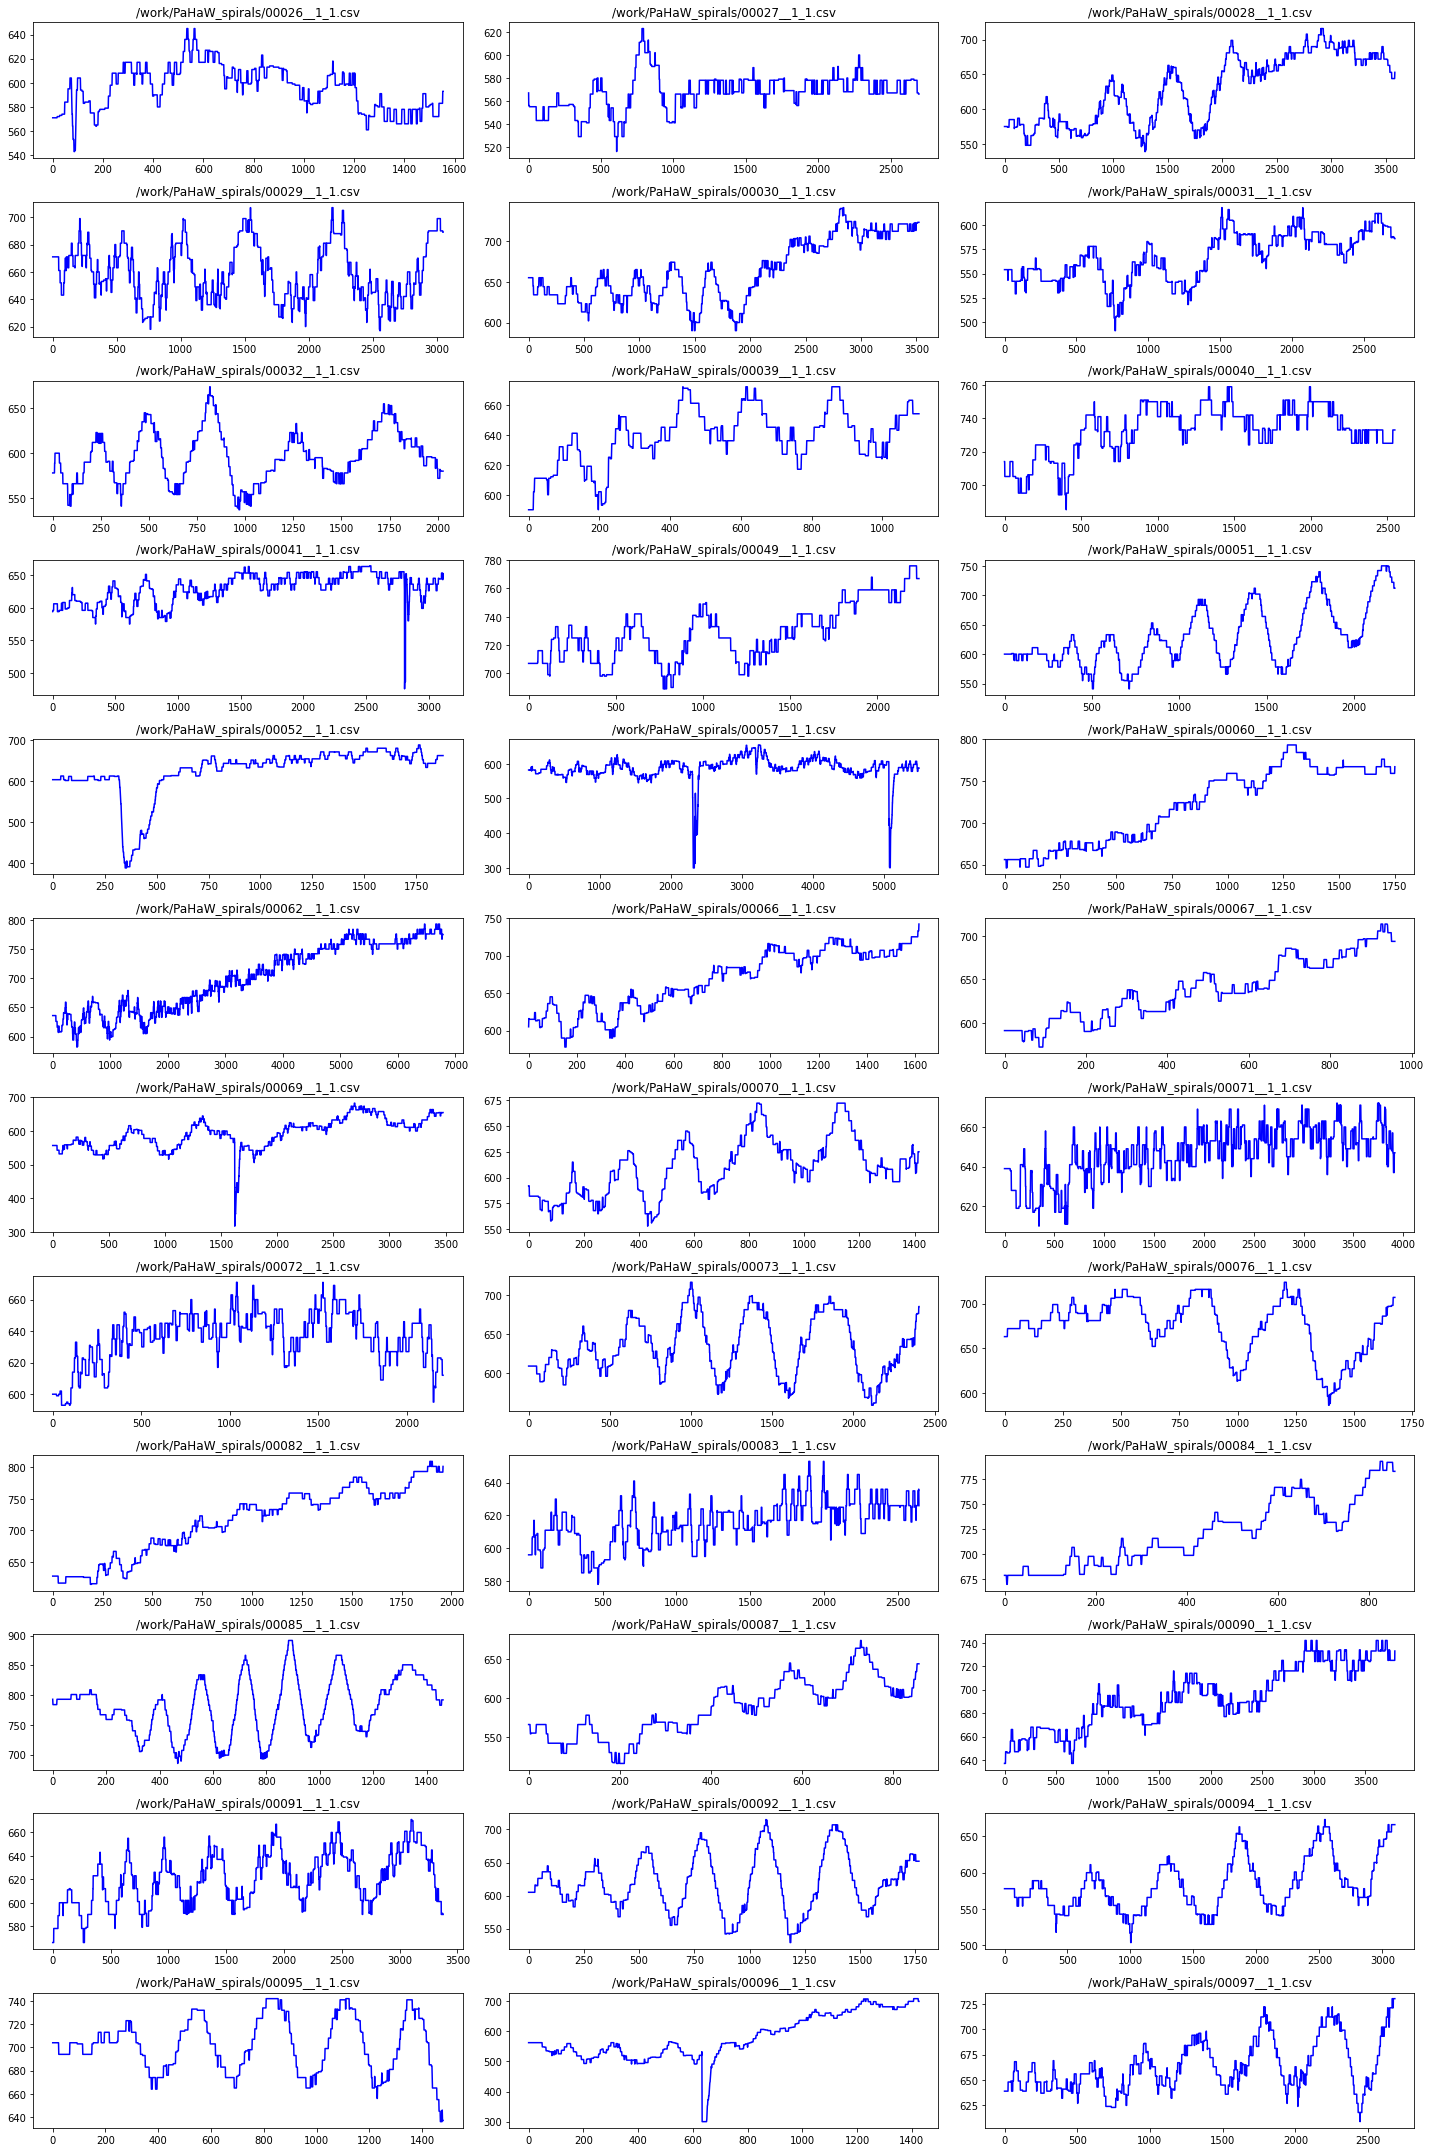

In [95]:
count = 0
plt.figure(figsize = (20, 30), tight_layout = True)
for filename in controlFiles: 
    df = pd.read_csv(filename, header = None)
    altitude = df[5]
    count += 1
    plt.subplot(12, 3, count)
    plt.plot(altitude, 'b')
    plt.title(filename)
plt.show()

### Altitude Plots Patients

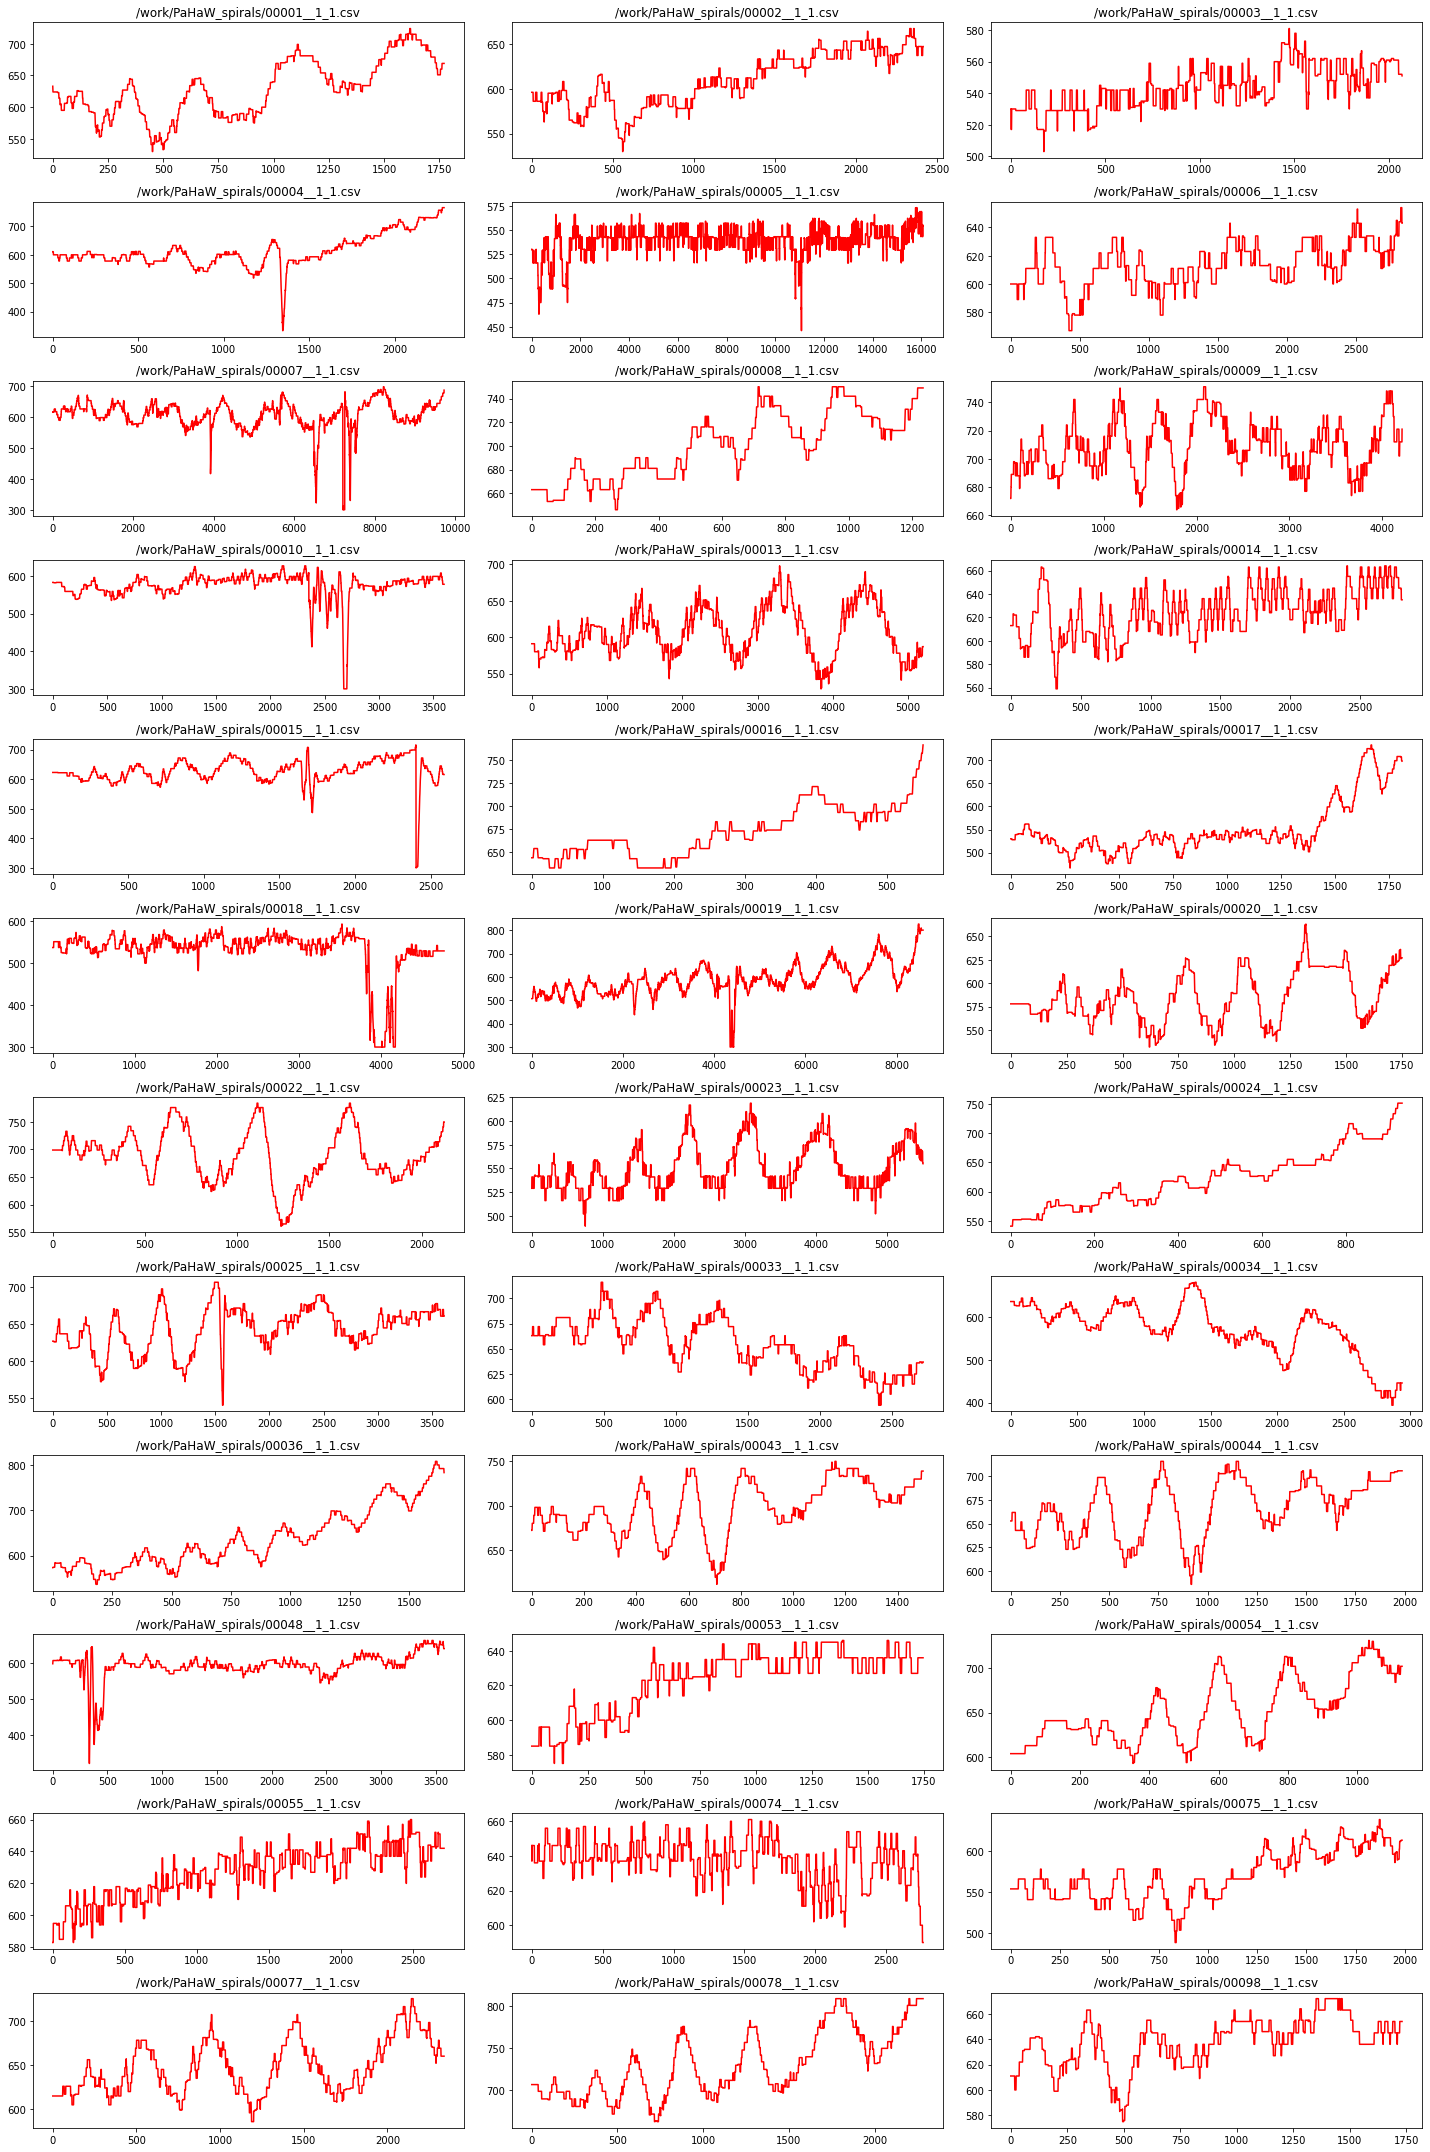

In [93]:
count = 0
plt.figure(figsize = (20, 30), tight_layout = True)
for filename in patientFiles: 
    df = pd.read_csv(filename, header = None)
    altitude = df[5]
    count += 1
    plt.subplot(12, 3, count)
    plt.plot(altitude, 'r')
    plt.title(filename)
plt.show()

### Azimuth Feature Selection
STD, IQR and max values aren't looking too good lol
Thinking of sinusoidal regression but doesn't seem like it would make too much sense

Text(0.5, 1.0, 'Max Azimuth')

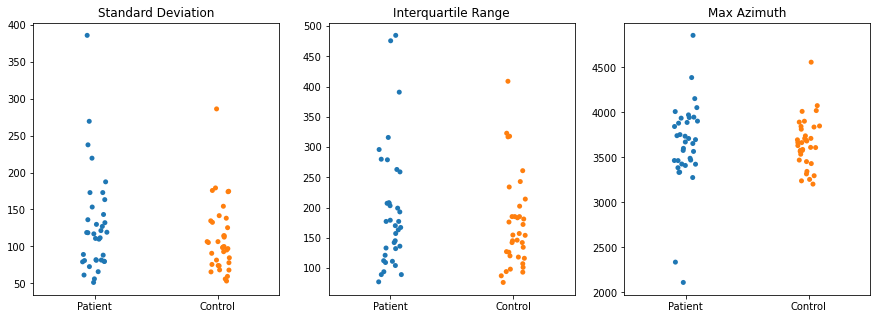

In [88]:
std = []
iqr = []
xvalue = []
max_azimuth = []
for filename in patientFiles: 
    azimuth = azimuthPreventOverflow(filename)
    std.append(np.std(azimuth))
    iqr.append(np.quantile(azimuth, 0.75) - np.quantile(azimuth, 0.25))
    max_azimuth.append(np.max(azimuth))
    xvalue.append('Patient')

for filename in controlFiles:
    azimuth = azimuthPreventOverflow(filename)
    std.append(np.std(azimuth))
    iqr.append(np.quantile(azimuth, 0.75) - np.quantile(azimuth, 0.25))
    max_azimuth.append(np.max(azimuth))
    xvalue.append('Control')

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.stripplot(x = xvalue, y = std)
plt.title('Standard Deviation')
plt.subplot(1, 3, 2)
sns.stripplot(x = xvalue, y = iqr)
plt.title('Interquartile Range')
plt.subplot(1, 3, 3)
sns.stripplot(x = xvalue, y = max_azimuth)
plt.title('Max Azimuth')

### Altitude Feature Selection

Text(0.5, 1.0, 'Max Altitude')

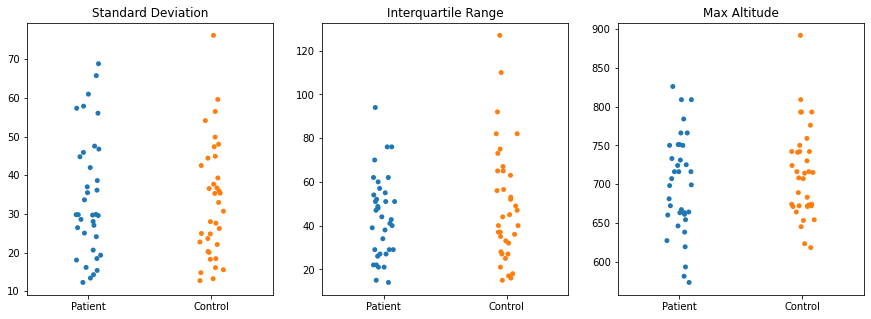

In [96]:
altitude_std = []
altitude_iqr = []
altitude_xvalue = []
max_altitude = []
for filename in patientFiles: 
    df = pd.read_csv(filename, header = None)
    altitude = df[5]
    altitude_std.append(np.std(altitude))
    altitude_iqr.append(np.quantile(altitude, 0.75) - np.quantile(altitude, 0.25))
    max_altitude.append(np.max(altitude))
    altitude_xvalue.append('Patient')

for filename in controlFiles:
    df = pd.read_csv(filename, header = None)
    altitude = df[5]
    altitude_std.append(np.std(altitude))
    altitude_iqr.append(np.quantile(altitude, 0.75) - np.quantile(altitude, 0.25))
    max_altitude.append(np.max(altitude))
    altitude_xvalue.append('Control')

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.stripplot(x = xvalue, y = altitude_std)
plt.title('Standard Deviation')
plt.subplot(1, 3, 2)
sns.stripplot(x = xvalue, y = altitude_iqr)
plt.title('Interquartile Range')
plt.subplot(1, 3, 3)
sns.stripplot(x = xvalue, y = max_altitude)
plt.title('Max Altitude')

## Pressure Regression

Doesn't seem like regression really makes sense given all the different shapes of the pressure curve; these seem like mostly just tremors

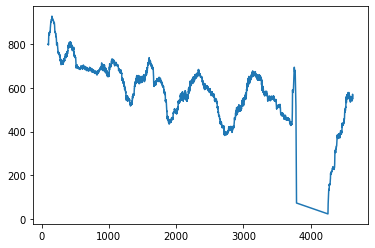

0.5431791195709926
-0.08202392749982806
264817.788395342


In [ ]:
df = pd.read_csv('/work/PaHaW_spirals/00018__1_1.csv', header = None)
pressure = df[df[3] == 1][6]
pressure = pressure[100:len(pressure)-150]
plt.plot(pressure)
plt.show()
model = sm.OLS(pressure, sm.add_constant(np.array(range(len(pressure)))))
results = model.fit()
print(results.rsquared)
print(results.params[1])
print (sum(abs(results.resid)))

Text(0.5, 1.0, 'Patient vs. Control X1 Constants for Pressure Regression')

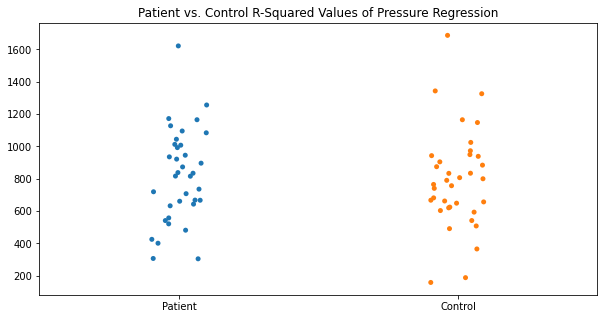

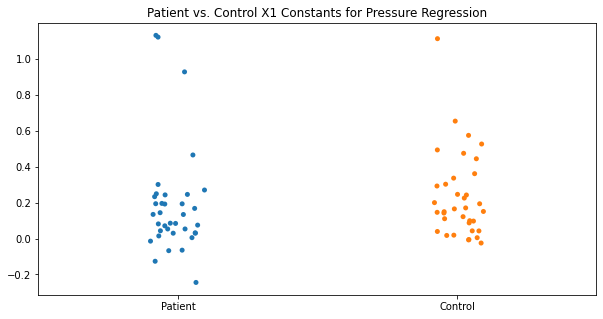

In [ ]:
# Pressure Regression Scatterplots (Don't show too much promise at the moment (other than x1 constant))
rsquared = []
x1_constants = []
xlist = []
for filename in patientFiles: 
    df = pd.read_csv(filename, header = None)
    pressure = df[df[3] == 1][6]
    pressure[100:len(pressure)-150]
    model = sm.OLS(pressure, sm.add_constant(np.array(range(len(pressure)))))
    results = model.fit()
    rsquared.append(results.params.const)
    x1_constants.append(results.params[1])
    xlist.append('Patient')

for filename in controlFiles: 
    df = pd.read_csv(filename, header = None)
    pressure = df[df[3] == 1][6]
    pressure[100:len(pressure)-150]
    model = sm.OLS(pressure, sm.add_constant(np.array(range(len(pressure)))))
    results = model.fit()
    rsquared.append(results.params.const)
    x1_constants.append(results.params[1])
    xlist.append('Control')

plt.figure(1, figsize = (10, 5))
sns.stripplot(x = xlist, y = rsquared)
plt.title('Patient vs. Control R-Squared Values of Pressure Regression')
plt.figure(2, figsize = (10, 5))
sns.stripplot(x = xlist, y = x1_constants)
plt.title('Patient vs. Control X1 Constants for Pressure Regression')

## Double Smoothing Function 
We're NOT using this!!!

In [ ]:
def extraSmoothCurveFeature(curve, n): 
    t = np.linspace(0, curve.shape[1], n)
    
    sx = interpolate.UnivariateSpline(np.arange(curve.shape[1]-10), curve[0,:-10], k=4)
    sy = interpolate.UnivariateSpline(np.arange(curve.shape[1]-10), curve[1,:-10], k=4)
    pressure_f = interpolate.UnivariateSpline(np.arange(np.shape(df[6])[0]), np.array(df[6]), k=4)
    sx.set_smoothing_factor(2000)
    sy.set_smoothing_factor(2000)

    # velocity functions
    sxdot = sx.derivative()
    sydot = sy.derivative()

    # velocity arrays
    xvel = sxdot(t)
    yvel = sydot(t)

    # smoothed velocity functions
    smoothed_sxdot = interpolate.UnivariateSpline(np.arange(len(xvel)), xvel, k=4)
    smoothed_sydot = interpolate.UnivariateSpline(np.arange(len(yvel)), yvel, k=4)

    xvel1 = smoothed_sxdot(t)
    yvel1 = smoothed_sydot(t)

    # acceleration functions
    sxdotdot = smoothed_sxdot.derivative()
    sydotdot = smoothed_sydot.derivative()
    
    # acceleration arrays
    xaccel = sxdotdot(t)
    yaccel = sydotdot(t)

    # smoothed acceleration functions
    '''smoothed_sxdotdot = interpolate.UnivariateSpline(np.arange(len(xaccel)), xaccel, k = 4)
    smoothed_sydotdot = interpolate.UnivariateSpline(np.arange(len(yaccel)), yaccel, k=4)'''

    # jerk functions 
    sxdotdotdot = sxdotdot.derivative()
    sydotdotdot = sydotdot.derivative()

    # jerk arrays 
    xjerk = sxdotdotdot(t)
    yjerk = sydotdotdot(t)

    velocity = np.sqrt(xvel1**2 + yvel1**2)
    acceleration = np.sqrt(xaccel**2 + yaccel**2)
    jerk = np.sqrt(xjerk**2 + yjerk**2)

    return velocity, acceleration, jerk, pressure_f(t)

## On/Off Button State; Pen-Pickups
Used ratios of on state data points over all data points; not much separation between patient and control with 
such a ratio. 

[1.0, 1.0, 1.0, 0.9798951048951049, 1.0, 0.9901199717713479, 0.8820444261620732, 1.0, 1.0, 0.8785773826062795, 1.0, 1.0, 0.9092664092664092, 1.0, 1.0, 0.9023674837628326, 0.9223866682204871, 1.0, 0.9086198775317946, 1.0, 0.9829059829059829, 0.9601328903654485, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9404528934861616, 1.0, 1.0, 1.0, 1.0, 0.9964753272910373, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9980130570536475, 1.0, 1.0, 1.0, 1.0, 0.931023419955085, 1.0, 1.0, 0.8829787234042553, 0.9502732240437158, 1.0, 1.0, 1.0, 1.0, 0.9744105807935595, 1.0, 1.0, 1.0, 1.0, 0.997016706443914, 0.9821337417049515, 1.0, 0.9568764568764568, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.928521373510862, 1.0]


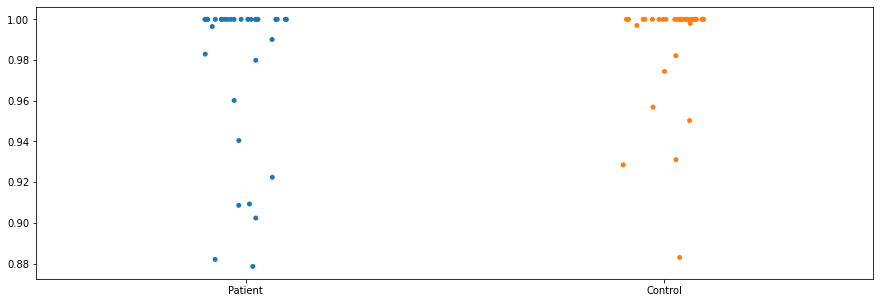

In [ ]:
plt.figure(figsize = (15, 5))
ratio = []
xlist = []
for filename in patientFiles: 
    df = pd.read_csv(filename, header = None)
    '''print(filename)
    print(df[3].value_counts())'''
    off = df[3][df[3]==0]
    on = df[3][df[3]==1]
    ratio.append(len(on)/len(df[3]))
    xlist.append('Patient')

for filename in controlFiles: 
    df = pd.read_csv(filename, header = None)
    '''print(filename)
    print(df[3].value_counts())'''
    off = df[3][df[3]==0]
    on = df[3][df[3]==1]
    ratio.append(len(on)/len(df[3]))
    xlist.append('Control')

sns.stripplot(x = xlist, y = ratio)
print(ratio)

## Drawings with Pressure-based Colorbars

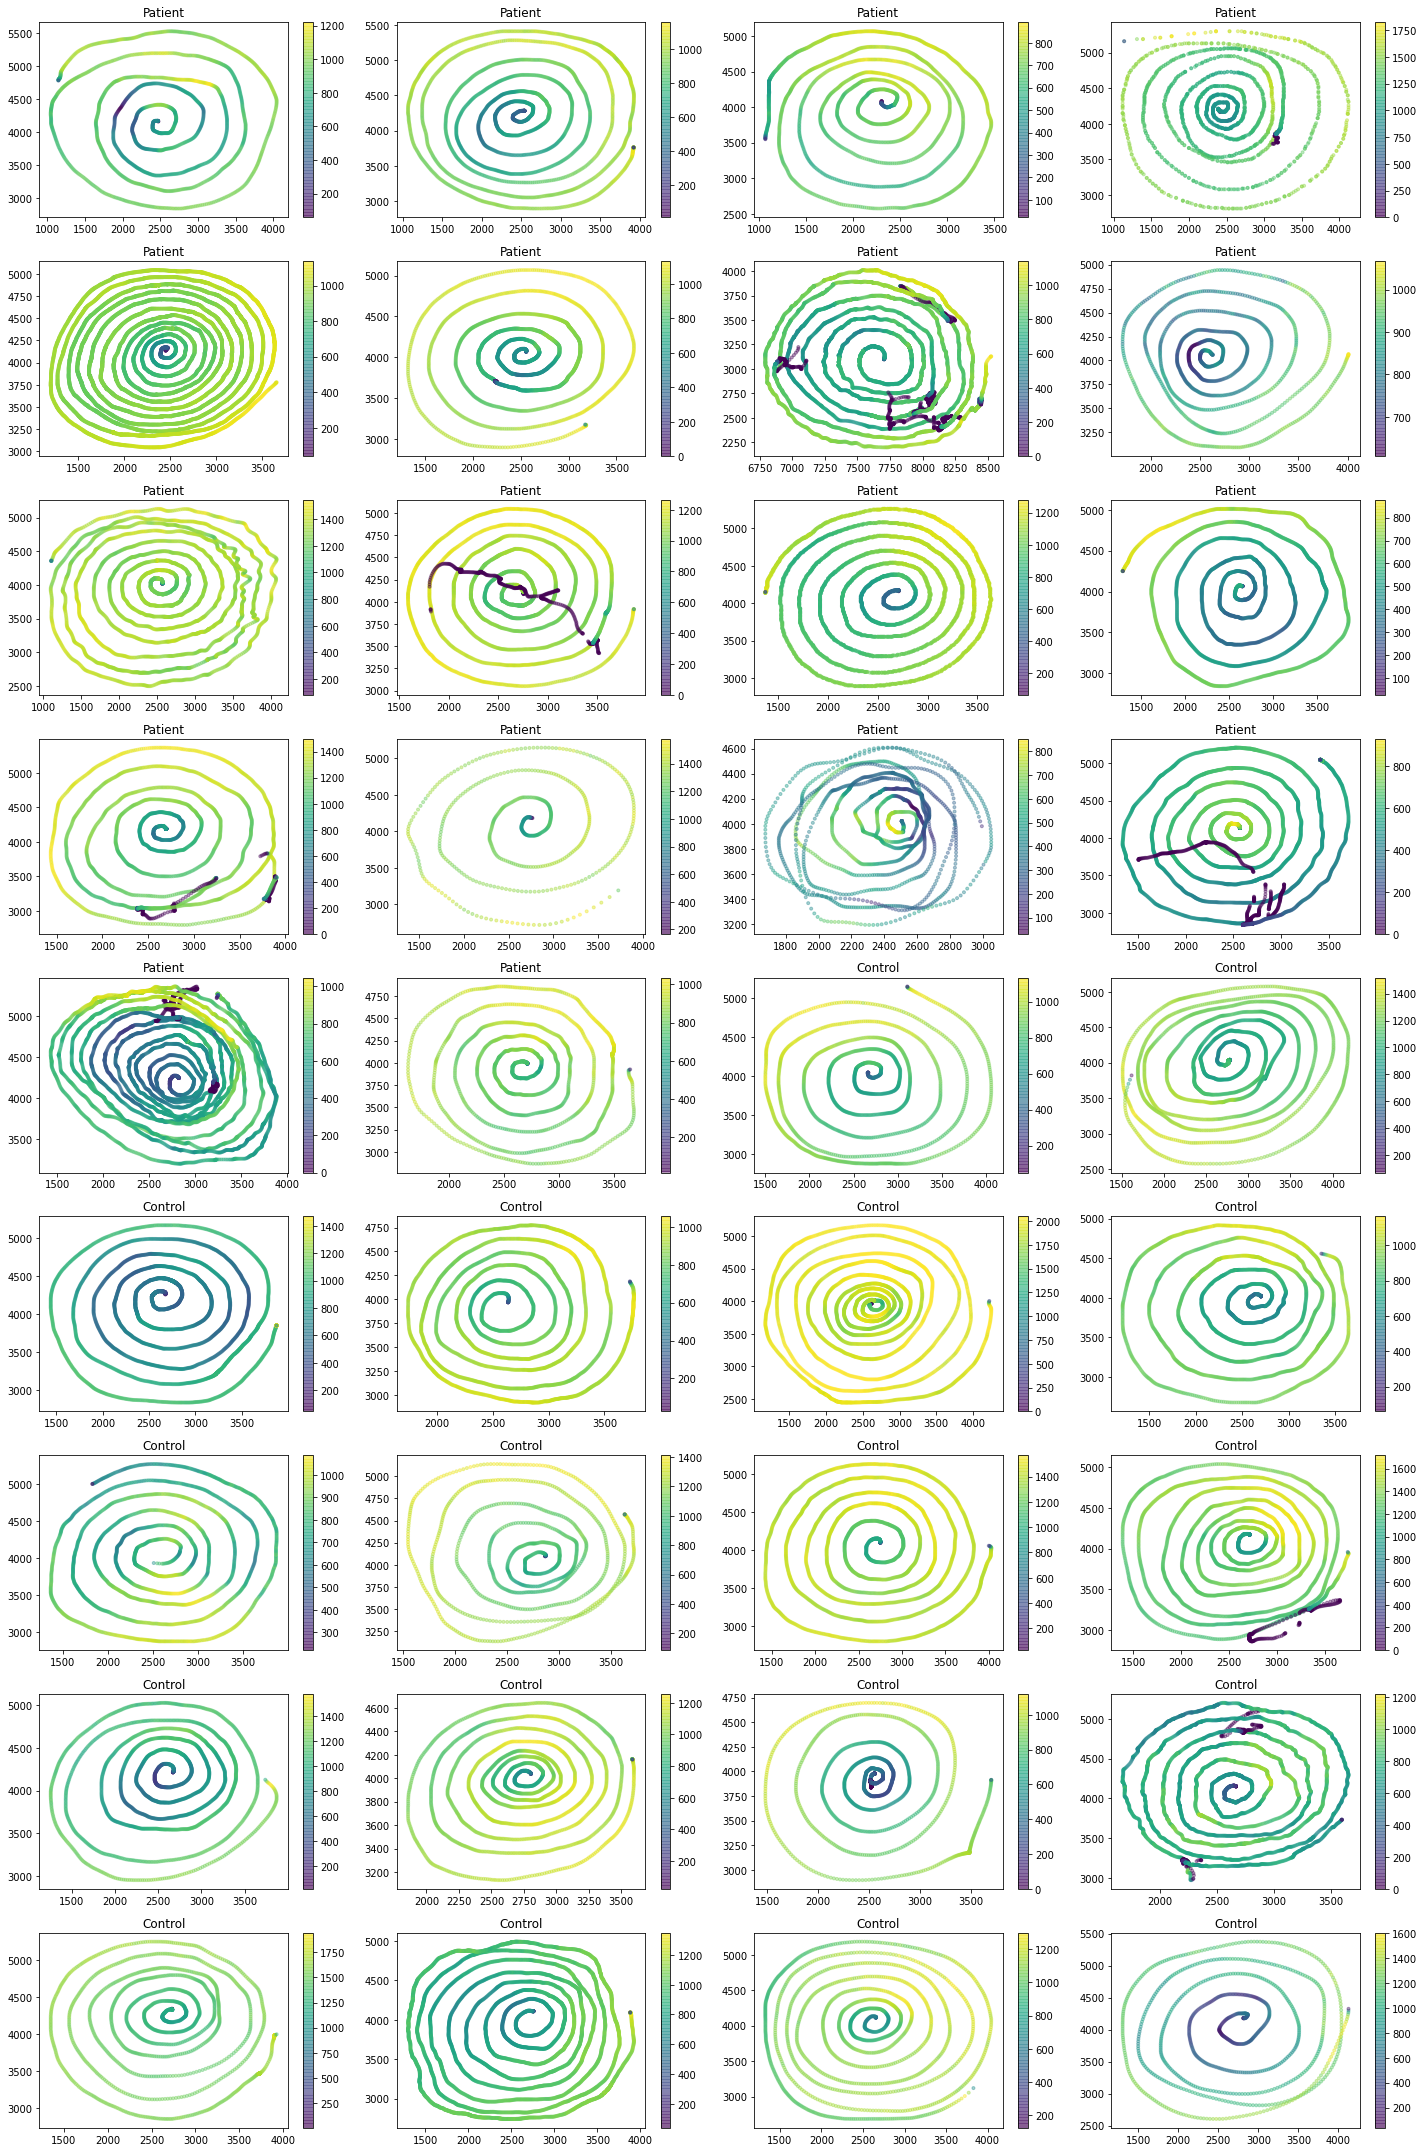

In [ ]:
#0    	X coordinate
#1    	Y coordinate
#2    	time stamp
#3    	on/off state
#4    	azimuth
#5    	altitude
#6    	pressure

#Plot of Pressure over the Coordinates
count = 0
plt.figure(figsize = (20, 30), tight_layout = True)
for filename in patientFiles[:18]+controlFiles[:18]: #plot 18 patients and then 18 controls
    df = pd.read_csv(filename, header = None)
    x = df[0]
    y = df[1]
    t = df[2]
    count += 1

    plt.subplot(9, 4, count)
    plt.scatter(x, y, c = df[6], alpha = 0.4, marker = '.')
    if filename in patientFiles:
        plt.title('Patient')
    else:
        plt.title('Control')
    plt.colorbar()
plt.show()
#df

## Smoothing Function 
We're using this rn

In [3]:
# return (velocity, acceleration, jerk, curvature)
def smoothCurveFeature(curve, n):
    smoothing_factor = len(curve[0,:]) * 50
    t = np.linspace(0, curve.shape[1], n)

    sx = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[0,:], k=4)
    sy = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[1,:], k=4)
    pressure_f = interpolate.UnivariateSpline(np.arange(np.shape(df[6])[0]), np.array(df[6]), k=4)
    
    sx.set_smoothing_factor(smoothing_factor)
    sy.set_smoothing_factor(smoothing_factor)
    pressure_f.set_smoothing_factor(smoothing_factor)
    
    # velocity based on the splined x and y coordinates
    sxdot = sx.derivative()
    sydot = sy.derivative()
    #xvelArr = sxdot(t)
    #yvelArr = sydot(t)
    
    # splined velocity functions (used to calculate acceleration)
    '''velx_spline = interpolate.UnivariateSpline(np.arange(len(xvelArr)), xvelArr, k=4)
    vely_spline = interpolate.UnivariateSpline(np.arange(len(yvelArr)), yvelArr, k=4)
    velx_spline.set_smoothing_factor(smoothing_factor)
    vely_spline.set_smoothing_factor(smoothing_factor)'''

    # acceleration functions based on the splined velocity x & y functions
    #sxdotdot = velx_spline.derivative()
    #sydotdot = vely_spline.derivative()
    sxdotdot = sxdot.derivative()
    sydotdot = sydot.derivative()

    # splined acceleration functions 
    '''xaccArr = sxdotdot(t)
    yaccArr = sydotdot(t)
    accelx_spline = interpolate.UnivariateSpline(np.arange(len(xaccArr)), xaccArr, k=4)
    accely_spline = interpolate.UnivariateSpline(np.arange(len(yaccArr)), yaccArr, k=4)
    accelx_spline.set_smoothing_factor(smoothing_factor)
    accely_spline.set_smoothing_factor(smoothing_factor)'''

    # jerk based on splined accel x & y functions
    #sxdotdotdot = accelx_spline.derivative()
    #sydotdotdot = accely_spline.derivative()
    sxdotdotdot = sxdotdot.derivative()
    sydotdotdot = sydotdot.derivative()
    #xjerkArr = sxdotdotdot(t)
    #yjerkArr = sydotdotdot(t)

    #jerkx_spline = interpolate.UnivariateSpline(np.arange(len(xjerkArr)), xjerkArr, k=4)
    #jerky_spline = interpolate.UnivariateSpline(np.arange(len(yjerkArr)), yjerkArr, k=4)
    #jerkx_spline.set_smoothing_factor(smoothing_factor)
    #jerky_spline.set_smoothing_factor(smoothing_factor)
    
    '''new_curve = np.zeros((2, n))
    new_curve[0,:] = sx(t)
    new_curve[1,:] = sy(t)'''

    #calculate velocity
    velocity = np.sqrt((sydot(t))**2 + (sxdot(t))**2)
    #velocity_f = interpolate.UnivariateSpline(np.arange(len(velocity)), velocity)
    #velocity_f.set_smoothing_factor(smoothing_factor)

    #calculate acceleration
    acceleration = np.sqrt((sydotdot(t))**2 + (sxdotdot(t))**2)
    #accleration = np.sqrt((velx_spline(t))**2 + (vely_spline(t))**2)
    #acceleration = interpolate.UnivariateSpline(np.arange(len(accel)), accel)
    #acceleration.set_smoothing_factor(smoothing_factor)

    #calculate jerk
    #jerk = np.sqrt((accelx_spline(t))**2 + (accely_spline(t))**2)
    jerk = np.sqrt((sydotdotdot(t))**2 + (sxdotdotdot(t))**2)
    #jerk = interpolate.UnivariateSpline(np.arange(len(jk)), jk)
    #jerk.set_smoothing_factor(smoothing_factor)
    
    # calculate curvature
    curvature = (sxdot(t) * sydotdot(t) - sydot(t) * sxdotdot(t))/(sxdot(t)**2 + sydot(t)**2)**(3/2)

    pressure = pressure_f(t)

    '''# spline fit to curvature
    try: 
        curv_spline = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curvature)
    except: 
        print(len(np.arange(curve.shape[1])), len(curvature))
    curv_spline_eval = curv_spline(t)
    
    curv_dot_spline = curv_spline.derivative()
    curv_dot_eval = curv_dot_spline(t)'''
    
    # new_curve: interpolated/transformed curve, curv_spline_eval: curvature, curv_dot_eval: rate of change of curvature
    return sx(t), sy(t), velocity, acceleration, jerk, curvature, pressure


## Comparison of Smoothed & Extra Smoothed

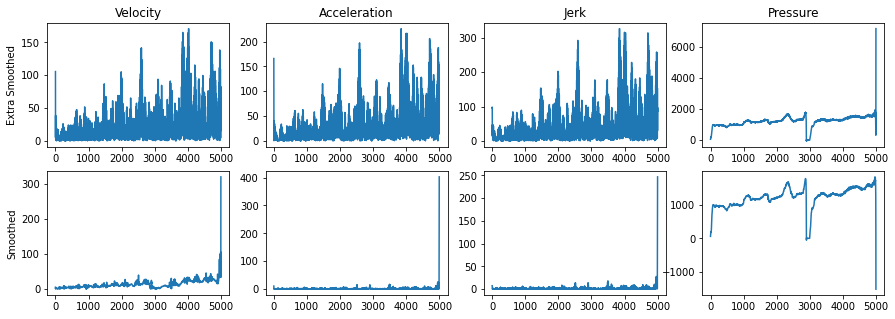

In [ ]:
df = pd.read_csv('/work/PaHaW_spirals/00004__1_1.csv', header = None)
x = df[1][:2500]
y = df[0][:2500]
t = df[2]
curve = np.array([x, y])
velocity, acceleration, jerk, pressure = extraSmoothCurveFeature(curve, n)
plt.figure(figsize = (15, 5))
plt.subplot(2, 4, 1)
plt.ylabel("Extra Smoothed")
plt.plot(velocity)
plt.title("Velocity")
plt.subplot(2, 4, 2)
plt.plot(acceleration)
plt.title("Acceleration")
plt.subplot(2, 4, 3)
plt.title("Jerk")
plt.plot(jerk) 
plt.subplot(2, 4, 4)
plt.title("Pressure")
plt.plot(pressure)
_, _, velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n)
plt.subplot(2, 4, 5)

plt.plot(velocity)
plt.ylabel("Smoothed")
plt.subplot(2, 4, 6)
plt.plot(acceleration)
plt.subplot(2, 4, 7)
plt.plot(jerk)
plt.subplot(2, 4, 8)
plt.plot(pressure)

## Plot of Velocity, Acceleration, Jerk, and Pressure for a Singe Patient after smoothCurveFeature function

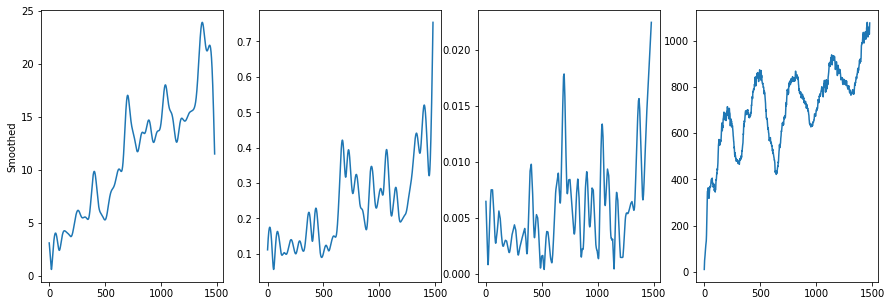

In [ ]:
df = pd.read_csv('/work/PaHaW_spirals/00002__1_1.csv', header = None)
x = df[df[3]==1][0][:1480]
y = df[df[3]==1][1][:1480]
t = df[df[3]==1][2][:1480]
n = 1480
curve = np.array([x, y])
_, _, velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n)
plt.figure(figsize = (15, 5))
plt.subplot(1, 4, 1)
plt.plot(velocity)
plt.ylabel("Smoothed")
plt.subplot(1, 4, 2)
plt.plot(acceleration)
plt.subplot(1, 4, 3)
plt.plot(jerk)
plt.subplot(1, 4, 4)
plt.plot(pressure)

## Curvature Regression

Text(0.5, 1.0, 'Curvature after Removing Outliers')

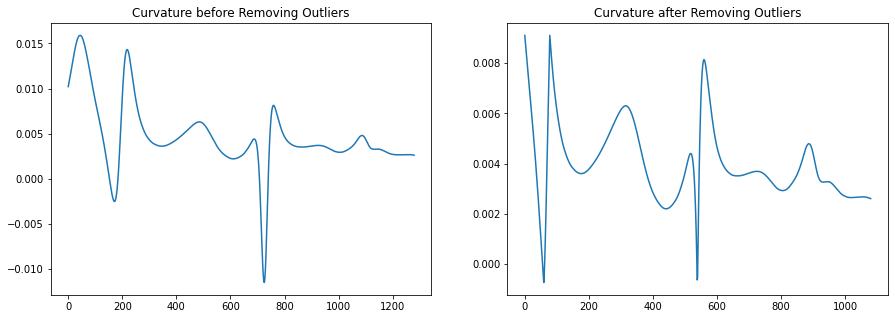

In [28]:
df = pd.read_csv('/work/PaHaW_spirals/00007__1_1.csv', header = None)
x = df[df[3]==1][0][:1480]
y = df[df[3]==1][1][:1480]
t = df[df[3]==1][2][:1480]
n = 1480
curve = np.array([x, y])
_, _, velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n)
curvature = curvature[100:len(curvature)-100]
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(curvature)
plt.title("Curvature before Removing Outliers")
Q1 = np.quantile(curvature, 0.25)
Q3 = np.quantile(curvature, 0.75)
IQR = Q3 - Q1
outliers = (curvature < (Q1 - 1.5 * IQR)) |(curvature > (Q3 + 1.5 * IQR))
curvature = curvature[~outliers]
plt.subplot(1, 2, 2)
plt.plot(curvature)
plt.title("Curvature after Removing Outliers")

In [ ]:
# Pressure Regression Scatterplots (Don't show too much promise at the moment (other than x1 constant))
rsquared = []
x1_constants = []
xlist = []
for filename in patientFiles: 
    df = pd.read_csv(filename, header = None)
    pressure = df[df[3] == 1][6]
    pressure[100:len(pressure)-150]
    model = sm.OLS(pressure, sm.add_constant(np.array(range(len(pressure)))))
    results = model.fit()
    rsquared.append(results.params.const)
    x1_constants.append(results.params[1])
    xlist.append('Patient')

for filename in controlFiles: 
    df = pd.read_csv(filename, header = None)
    pressure = df[df[3] == 1][6]
    pressure[100:len(pressure)-150]
    model = sm.OLS(pressure, sm.add_constant(np.array(range(len(pressure)))))
    results = model.fit()
    rsquared.append(results.params.const)
    x1_constants.append(results.params[1])
    xlist.append('Control')

x = df[df[3]==1][0][:1480]
y = df[df[3]==1][1][:1480]
t = df[df[3]==1][2][:1480]
n = 1480
curve = np.array([x, y])
_, _, velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n)
curvature = curvature[100:len(curvature)-100]
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(curvature)
plt.title("Curvature before Removing Outliers")
Q1 = np.quantile(curvature, 0.25)
Q3 = np.quantile(curvature, 0.75)

## Feature Calculation Functions

In [ ]:
# duration
def duration_calc(timestamps): 
    total_duration = timestamps[len(timestamps) - 1] - timestamps[0]
    return total_duration

# total displacement
def total_displacement_calc(displacement): 
    total_displacement = np.sum(np.array(displacement))
    return total_displacement

In [ ]:
# mean velocity
def velocity_mean(velocity): 
    return np.mean(velocity)

# median velocity
def velocity_median(velocity): 
    return np.median(velocity)

# max velocity
def velocity_max(velocity): 
    return np.max(velocity)

# velocity std
def velocity_std(velocity): 
    return np.std(velocity)

# number of inversions in velocity (niv), normalized by total time
def velocity_niv(velocity): 
    maximum = argrelextrema(np.array(velocity), np.greater)  
    minimum = argrelextrema(np.array(velocity), np.less)  
    return (len(maximum[0])+len(minimum[0]))/duration_calc(timestamps)

# normal velocity variability
def velocity_nvv(velocity): 
    sigma_sum = 0
    for i in range(1, len(velocity) - 1): 
        sigma_sum += abs(velocity[i+1] - velocity[i])
    T = duration_calc(timestamps)
    nvv = 1/(T * abs(velocity_mean(velocity))) * sigma_sum
    return nvv

In [ ]:
# mean acceleration
def accel_mean(acceleration):
    return np.mean(acceleration)

# max acceleration
def accel_max(acceleration):
    return np.max(acceleration)
    
# median acceleration
def accel_median(acceleration): 
    return np.median(acceleration)

# acceleration std
def accel_std(acceleration):
    return np.std(acceleration)

# number of inversions in acceleration (nia): 
def accel_nia(acceleration):
    maximum = argrelextrema(np.array(acceleration), np.greater)  
    minimum = argrelextrema(np.array(acceleration), np.less)  
    return (len(maximum[0])+len(minimum[0]))/ duration_calc(timestamps)

In [ ]:
# mean jerk
def jerk_mean(jerk):
    return np.mean(jerk)

# max jerk
def jerk_max(jerk):
    return np.max(jerk)
    
# median jerk
def jerk_median(jerk): 
    return np.median(jerk)

# jerk std
def jerk_std(jerk):
    return np.std(jerk)

# number of inversions in jerk (nij): 
def jerk_nij(jerk):
    maximum = argrelextrema(np.array(jerk), np.greater)
    minimum = argrelextrema(np.array(jerk), np.less)     
    return (len(maximum[0]) + len(minimum[0]))/ duration_calc(timestamps)

In [ ]:
# number of inversions in curvature
def curvature_nic(curvature): 
    maximum = argrelextrema(np.array(curvature), np.greater)  
    minimum = argrelextrema(np.array(curvature), np.less)  
    return (len(maximum[0])+len(minimum[0])) / duration_calc(timestamps)

# true curvature at each point? 

In [ ]:
# mean pressure
def pressure_calc():
    return interpolate.UnivariateSpline(np.arange(np.shape(df[6])[0]), np.array(df[6]), k=4)

def pressure_mean(pressure):
    return np.mean(pressure)

# max pressure
def pressure_max(pressure):
    return np.max(pressure)
    
# median pressure
def pressure_median(pressure): 
    return np.median(pressure)

# pressure std
def pressure_std(pressure):
    return np.std(pressure)

# rate of change of pressure inversions
def rip(pressure): 
    maximum = argrelextrema(np.array(pressure), np.greater)  
    minimum = argrelextrema(np.array(pressure), np.less)  
    return (len(maximum[0])+len(minimum[0])) / duration_calc(timestamps)

## Calculating length of the shortest spiral - truncating all drawings to this length

In [ ]:
# Gets the time length of the shortest spiral
import os
min_val = 2000
for file in os.listdir(directory): 
    filename = os.fsdecode(file)
    path = os.path.join('/work/PaHaW_spirals', filename)
    x = df[0]
    df = pd.read_csv(path, header = None)
    if (len(x)) < 2000: 
        min_val = len(x)
print(min_val)

1480


## Constructing DataFrame

In [ ]:
lenDrawing = 1480
n = 1480
# constructs the Pandas DataFrame for gathering all the features
subject_id = []
mean_vel = []
median_vel = []
max_vel = []
vel_std = []
vel_niv = []
nvv = []
mean_accel = []
max_accel = []
median_accel = []
std_accel = []
nia_accel = []
mean_jerk = []  
max_jerk = []
median_jerk = []
std_jerk = []
nij = []
nic = []
mean_pressure = []
median_pressure = []
max_pressure = []
std_pressure = []
#total_displacement = []
duration = []
rate_of_change_pressure = []

# all the drawings
directory = os.fsencode('/work/PaHaW_spirals')
for file in os.listdir(directory): 
    filename = os.fsdecode(file)
    path = os.path.join('/work/PaHaW_spirals', filename)
    print (filename)
    df = pd.read_csv(path, header = None)
    x = df[df[3]==1][0][:lenDrawing]
    y = df[df[3]==1][1][:lenDrawing]
    t = df[df[3]==1][2][:lenDrawing]
    curve = np.array([x, y])
    _, _, velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n)
    timestamps = df[df[3]==1][2][:lenDrawing]

    velocity = velocity[50:len(velocity)]
    acceleration = acceleration[50:len(acceleration)]
    jerk = jerk[50:len(jerk)]
    pressure = pressure[50:len(pressure)]
    
    subject_id.append(filename[:-4])

    mean_vel.append(velocity_mean(velocity))
    median_vel.append(velocity_median(velocity))
    max_vel.append(velocity_max(velocity))
    vel_std.append(velocity_std(velocity))
    vel_niv.append(velocity_niv(velocity))
    nvv.append(velocity_nvv(velocity))

    mean_accel.append(accel_mean(acceleration))
    median_accel.append(accel_median(acceleration))
    max_accel.append(accel_max(acceleration))
    std_accel.append(accel_std(acceleration))
    nia_accel.append(accel_nia(acceleration))

    mean_jerk.append(jerk_mean(jerk))
    median_jerk.append(jerk_median(jerk))
    max_jerk.append(jerk_max(jerk))
    std_jerk.append(jerk_std(jerk))
    nij.append(jerk_nij(jerk))

    nic.append(curvature_nic(curvature))

    duration.append(duration_calc(timestamps))
    #total_displacement.append(total_displacement_calc(displacement))

    mean_pressure.append(pressure_mean(pressure))
    max_pressure.append(pressure_max(pressure))
    median_pressure.append(pressure_median(pressure))
    std_pressure.append(pressure_std(pressure))
    rate_of_change_pressure.append(rip(pressure))

00070__1_1.csv
00096__1_1.csv
00027__1_1.csv
00028__1_1.csv
00060__1_1.csv
00008__1_1.csv
00007__1_1.csv
00040__1_1.csv
00017__1_1.csv
00018__1_1.csv
00067__1_1.csv
00030__1_1.csv
00078__1_1.csv
00077__1_1.csv
00091__1_1.csv
00020__1_1.csv
00048__1_1.csv
00010__1_1.csv
00057__1_1.csv
00051__1_1.csv
00006__1_1.csv
00009__1_1.csv
00041__1_1.csv
00019__1_1.csv
00016__1_1.csv
00098__1_1.csv
00097__1_1.csv
00071__1_1.csv
00029__1_1.csv
00026__1_1.csv
00087__1_1.csv
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
00036__1_1.csv
00039__1_1.csv
00049__1_1.csv
00001__1_1.csv
00069__1_1.csv
00066__1_1.csv
00031__1_1.csv
00090__1_1.csv


In [ ]:
features_df_static = pd.DataFrame({
    'Subject ID': subject_id,
    'Mean Velocity': mean_vel, 'Velocity Std': vel_std, 'Peak Velocity': max_vel, 'NVV': nvv, 'NIV': vel_niv, 
    'Mean Acceleration': mean_accel, 'Acceleration Std': std_accel, 'Peak Acceleration': max_accel, 'NIA': nia_accel, 
    'Mean Jerk': mean_jerk, 'Jerk Std': std_jerk, 'Max Jerk': max_jerk, 'NIJ': nij, 
    'NIC': nic, 
    'Duration': duration, 
    #'Total Displacement': total_displacement, 
    'Mean Pressure': mean_pressure, 'Median Pressure': median_pressure, 'Peak Pressure': max_pressure, 'Pressure Std': std_pressure, 'Rate of Inversion in Pressure': rate_of_change_pressure
    })

features_df_static = features_df_static.sort_values(by = ['Subject ID'], ascending = True)
features_df_static = features_df_static.reset_index(drop=True)

In [ ]:
filename = '5factorlengthData_static_PaHaW_features.csv'
features_df_static.to_csv (filename, index = False, header=True)

In [ ]:
excel = pd.read_excel('corpus_PaHaW.xlsx', engine = 'openpyxl')
# exclude patients 61, 80, 89
category = excel['Disease'].drop([46, 60, 66]).values
features_df_static['Category'] = [i == 'PD' for i in category]
features_df_static

Subject ID  Mean Velocity  Velocity Std  Peak Velocity       NVV  \
0   00001__1_1      14.309278      4.236725      23.754177  0.000636   
1   00002__1_1      11.617773      5.443295      23.909372  0.000360   
2   00003__1_1      13.433291      4.692805      22.034349  0.000448   
3   00004__1_1       9.637759      5.083933      23.138526  0.000870   
4   00005__1_1       2.566846      0.500363       4.109742  0.000030   
..         ...            ...           ...            ...       ...   
67  00094__1_1       3.011254      0.921322       5.206290  0.000145   
68  00095__1_1      12.049072      7.867313      41.008142  0.000812   
69  00096__1_1      18.934544     12.565340      49.195928  0.001291   
70  00097__1_1       5.014160      1.772134       8.903979  0.000207   
71  00098__1_1      10.758638      4.405074      18.892058  0.000569   

         NIV  Mean Acceleration  Acceleration Std  Peak Acceleration  \
0   0.002179           0.284131          0.100270           0.839677   
1   0.001377           0.239878          0.115321           0.753604   
2   0.001607           0.305063          0.128690           0.600071   
3   0.002091           0.280377          0.154432           0.746779   
4   0.000097           0.034714          0.009487           0.055256   
..       ...                ...               ...                ...   
67  0.000858           0.038652          0.012507           0.109651   
68  0.003396           0.308609          0.239839           1.514959   
69  0.003482           0.739152          0.488113           2.121725   
70  0.001041           0.090222          0.029544           0.182449   
71  0.001998           0.213572          0.084258           0.412716   

         NIA  ...  Max Jerk       NIJ       NIC  Duration  Mean Pressure  \
0   0.003005  ...  0.034750  0.006687  0.003306     13310     829.811271   
1   0.001928  ...  0.022444  0.002920  0.002094     18151     721.039846   
2   0.002635  ...  0.025381  0.004564  0.002892     15558     704.104576   
3   0.003319  ...  0.056151  0.005001  0.003274     21994    1119.540896   
4   0.000122  ...  0.002399  0.000252  0.000138    123097     757.060588   
..       ...  ...       ...       ...       ...       ...            ...   
67  0.000815  ...  0.001308  0.001416  0.000901     23300     721.848936   
68  0.003753  ...  0.070399  0.006881  0.004021     11191    1538.461116   
69  0.004032  ...  0.120833  0.008796  0.005039     10914     785.438192   
70  0.001388  ...  0.005522  0.002231  0.001586     20173     835.059280   
71  0.002921  ...  0.020354  0.006533  0.002921     13011     536.044883   

    Median Pressure  Peak Pressure  Pressure Std  \
0        880.876952    1213.075358    186.370459   
1        752.894951    1079.056834    158.028077   
2        699.735658     868.964643     82.921941   
3       1169.357140    1772.179377    296.408990   
4        796.513440     961.186757    138.129056   
..              ...            ...           ...   
67       701.583187    1070.035628    127.393686   
68      1662.735059    1982.132466    309.856097   
69       846.733592    1094.074446    262.306486   
70       845.920753    1055.278612    128.205247   
71       561.566421     731.669210    113.308221   

    Rate of Inversion in Pressure  Category  
0                        0.021412      True  
1                        0.023800      True  
2                        0.021725      True  
3                        0.026325      True  
4                        0.003201      True  
..                            ...       ...  
67                       0.003991     False  
68                       0.018676     False  
69                       0.033993     False  
70                       0.012343     False  
71                       0.008224      True  

[72 rows x 22 columns]

## Strip Plots Showing Feature Separations

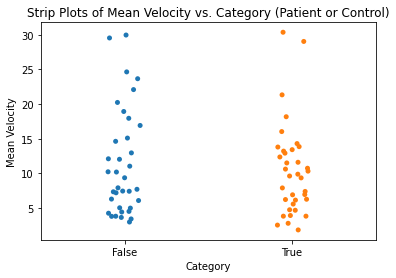

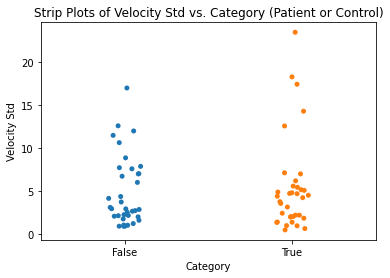

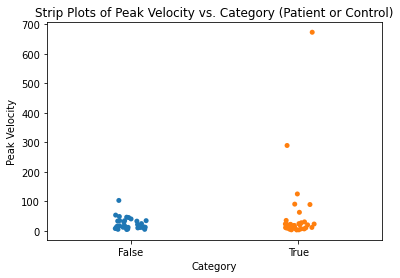

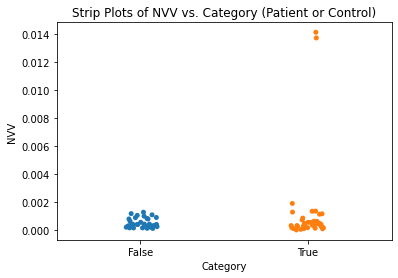

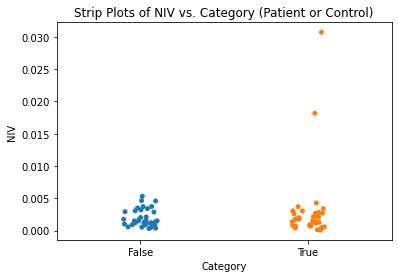

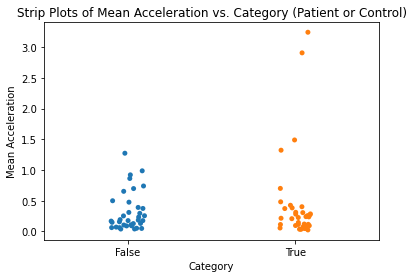

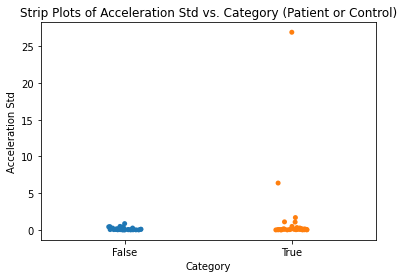

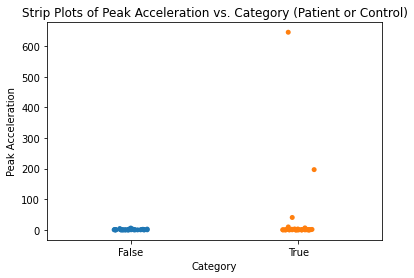

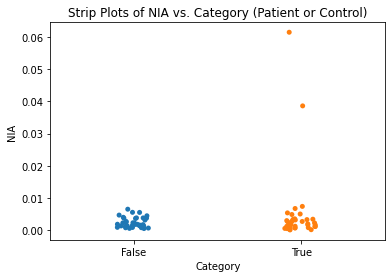

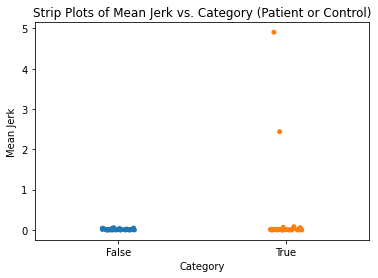

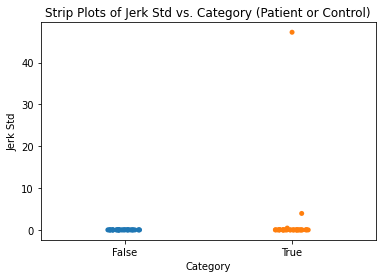

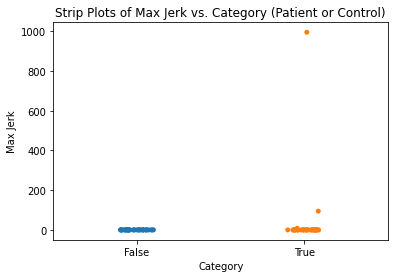

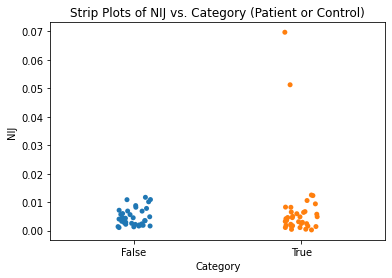

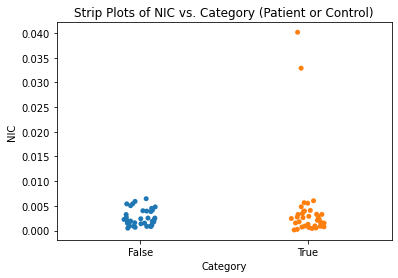

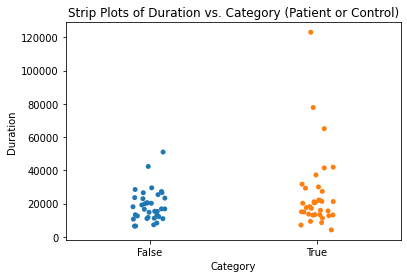

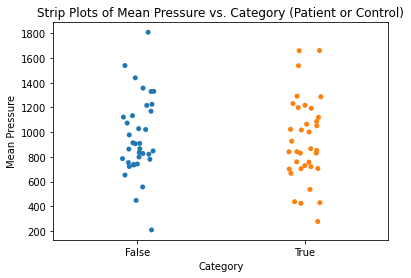

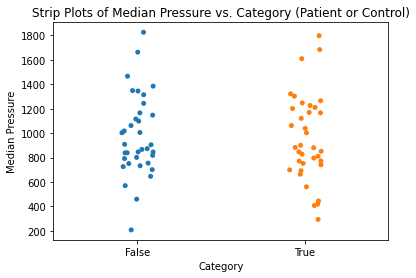

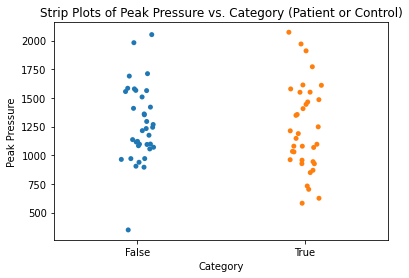

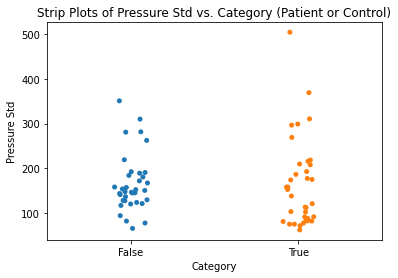

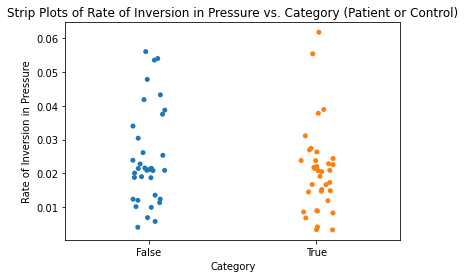

In [ ]:
for i in features_df_static.columns[1:-1]: 
    plt.figure()
    plt.title('Strip Plots of {} vs. Category (Patient or Control)'.format(i))
    sns.stripplot(x = features_df_static['Category'], y = features_df_static[i])

## Logistic Regression

['Mean Pressure' 'Median Pressure' 'Peak Pressure' 'Pressure Std'
 'Rate of Inversion in Pressure']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False  True  True  True False False False  True
  True  True False False False  True  True  True False False False False
 False False False False False False  True  True False  True  True False
 False False False False False False False False False False False  True]


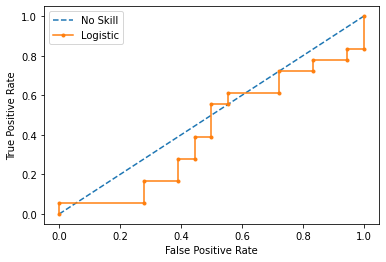

In [ ]:
# 1. import
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve

# 2. instantiate model
feature_cols = features_df_static.columns[-6:-1].values
print (feature_cols)
X = features_df_static.loc[:, feature_cols].values
y = features_df_static.Category.values
print (y)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=10)

logreg = LogisticRegression(solver='lbfgs', max_iter = 12000000)

# 3. fit 
logreg.fit(trainX, trainy)

pred_class = logreg.predict(testX)
pred_probs = logreg.predict_proba(testX)
pred_probs = pred_probs[:, 1]

# 4. calculate scores

# generate a no skill prediction (majority class)
random_probs = [0.5 for _ in range(len(testy))]

random_auc = roc_auc_score(testy, random_probs)
model_log_auc = roc_auc_score(testy, pred_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
model_log_auc

0.4166666666666667

## Support Vector Classifier

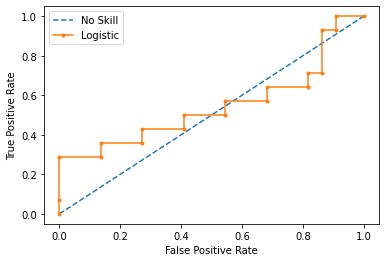

In [ ]:
from sklearn.svm import SVC

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1)

svclassifier = SVC(kernel='linear', probability = True)

svclassifier.fit(trainX, trainy)

pred_class = svclassifier.predict(testX)
pred_probs = svclassifier.predict_proba(testX)
pred_probs = pred_probs[:, 1]


# generate a no skill prediction (majority class)
random_probs = [1 for _ in range(len(testy))]

random_auc = roc_auc_score(testy, random_probs)
model_svc_auc = roc_auc_score(testy, pred_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
print(model_svc_auc)

0.5454545454545454


[0.05081282 0.06893297 0.06060627 0.0540659  0.04279644 0.04828387
 0.04640046 0.05194277 0.05530361 0.0429079  0.04608529 0.05175537
 0.04146536 0.04180461 0.04984602 0.0364094  0.03940577 0.04418783
 0.07179497 0.05519238]


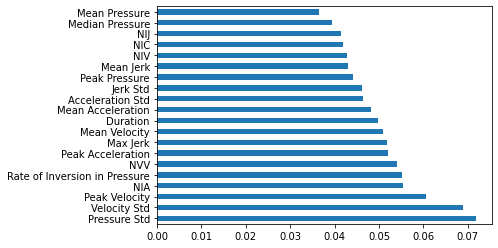

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

feature_cols = features_df_static.columns.values[1:-1]
Xcols = features_df_static.loc[:, feature_cols]
ycols = features_df_static.Category

model = ExtraTreesClassifier()
model.fit(Xcols,ycols)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xcols.columns)
#print(feat_importances)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>